# MOD300: Assignment 4

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Nov 26, 2025**


In [1]:
# install git package, only run once
#%pip install git+https://github.com/henrysky/milkyway_plot.git

In [2]:
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWSkyMap

from main import *

# Topic 1


# Task 1: Reproduce the image of the milky way via MWSkyMap


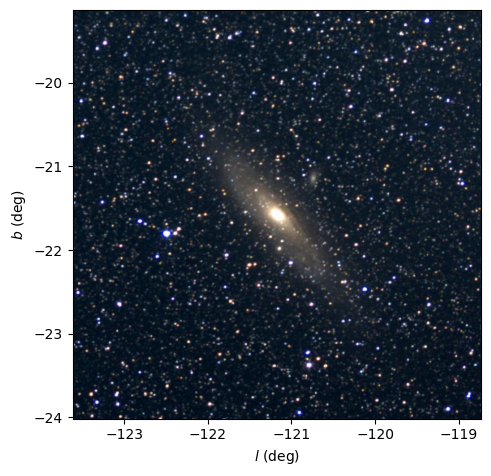

In [3]:
mw1 = MWSkyMap(
    center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)

fig, ax = plt.subplots(figsize=(5, 5))
mw1.transform(ax)
mw1.savefig('galaxy.png')
plt.show()

## Task 2: Generate multiple visualizations with different centers and radii


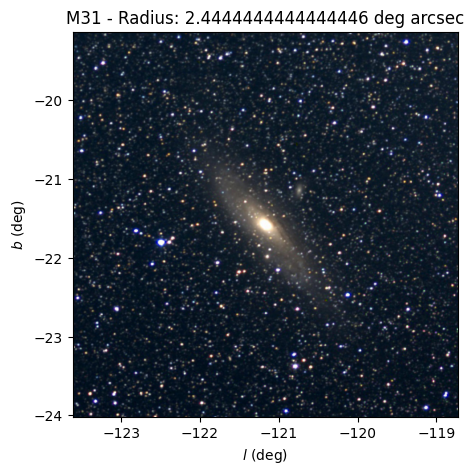

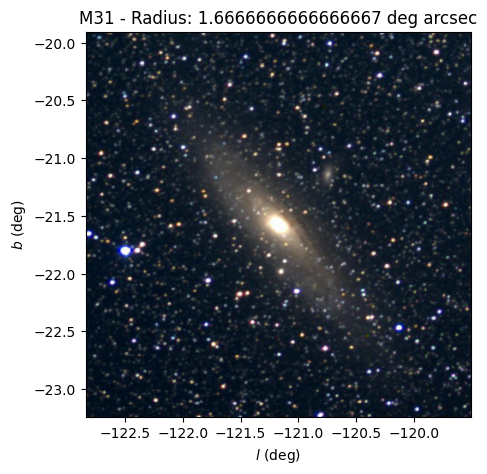

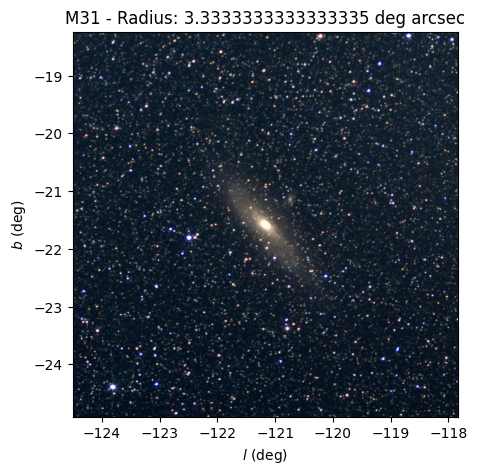

In [4]:
fig1, _ = create_sky_map("M31", (8800, 8800) * u.arcsec, "Mellinger color optical survey")
fig2, _ = create_sky_map("M31", (6000, 6000) * u.arcsec, "Mellinger color optical survey")
fig3, _ = create_sky_map("M31", (12000, 12000) * u.arcsec, "Mellinger color optical survey")

## Task 3: Convert the image to RGB np.array


In [5]:
img_array = plt2rgbarr(fig1)
print(f"Image array shape: {img_array.shape}")
print(f"Image array dtype: {img_array.dtype}")
print(f"Image array min/max values: {img_array.min()}/{img_array.max()}")
print(f"\nFirst pixel RGB values: {img_array[0, 0]}")


Image array shape: (500, 500, 3)
Image array dtype: uint8
Image array min/max values: 0/254

First pixel RGB values: [0 0 0]


## Task 4: Encoding


In [6]:
features, (h, w) = encode_pixels(img_array)

print("Feature array shape", features.shape)
print("Example encoded pixel (R, G, B normalized):", features[0])

Feature array shape (250000, 3)
Example encoded pixel (R, G, B normalized): [0. 0. 0.]


## Task 5: K-means clustering


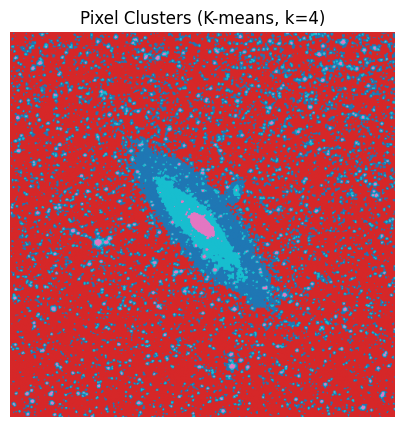

Cluster 0: dark background space - center RGB (normalized) = [ 0.15,  0.17, 0.22]
Cluster 1: dark background space - center RGB (normalized) = [ 0.05,  0.09, 0.14]
Cluster 2: red-ish region (labels - nebulae ) - center RGB (normalized) = [ 0.74,  0.72, 0.71]
Cluster 3: blue-ish region (spiral arms - hot stars) - center RGB (normalized) = [ 0.35,  0.35, 0.36]


In [7]:
label_image, kmeans = kmeans_cluster_pixels(img_array, n_clusters=4)

plot_cluster_labels(label_image, "Pixel Clusters (K-means, k=4)")

for desc in describe_clusters(kmeans): 
    print(desc)

## Task 6: Over-impose your cluster to the image generated in Task 2


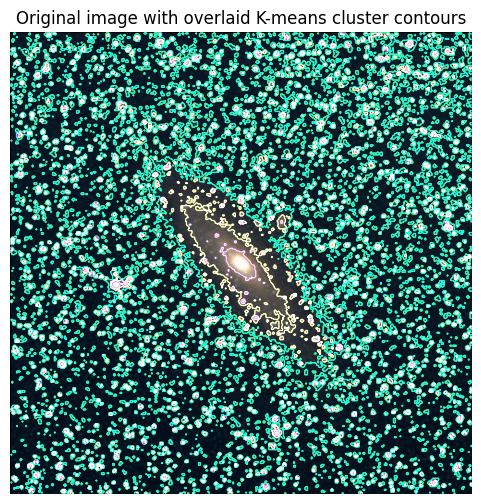

In [8]:
overlay_cluster_contours(img_array, label_image)

# Topic 2: Supervised learning: Machines versus human models, who can save the world??

## Task 0: Reproduce the project 2 exercise 5 plots for Ebola epidemic


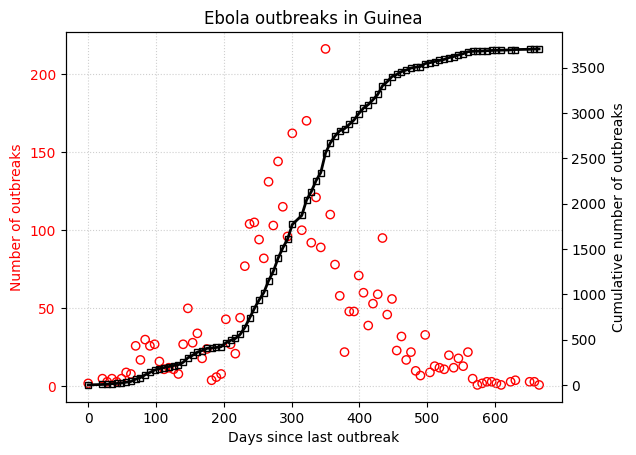

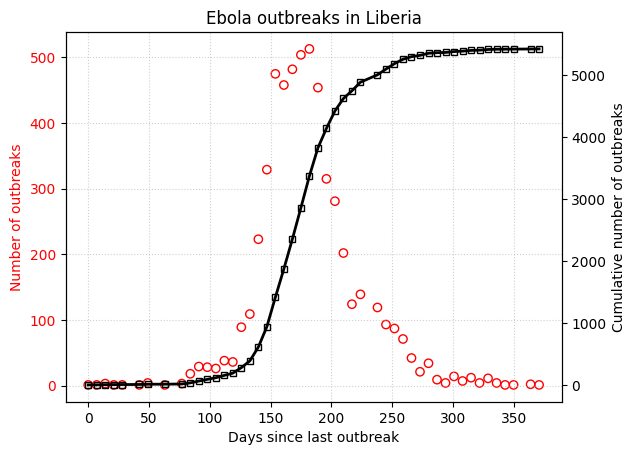

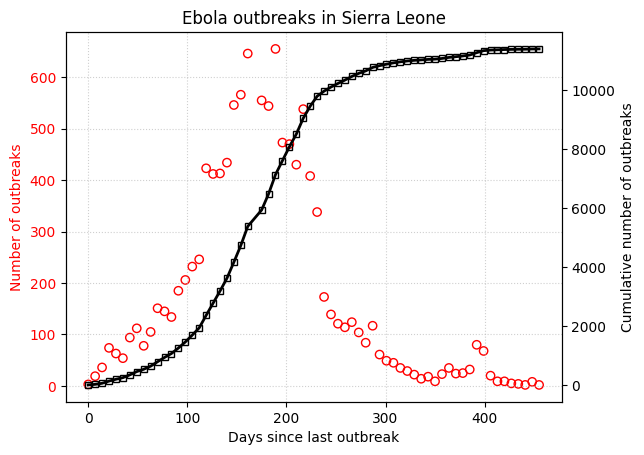

In [ ]:

countries_data = load_all_countries_data()

for country, (days, new_cases, cumulative_cases) in countries_data.items():
    plot_ebola_data(days, new_cases, cumulative_cases, country)


## Task 1: Train a line with linear regression on the data for the three countries


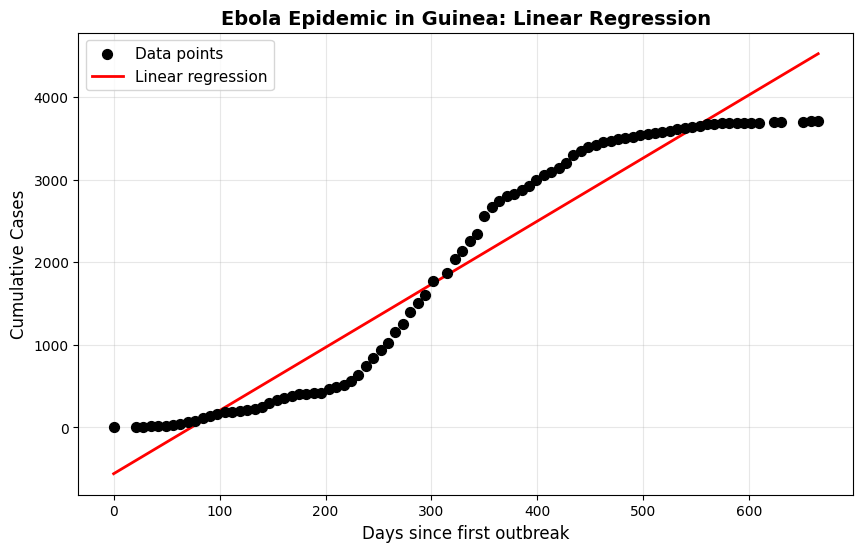

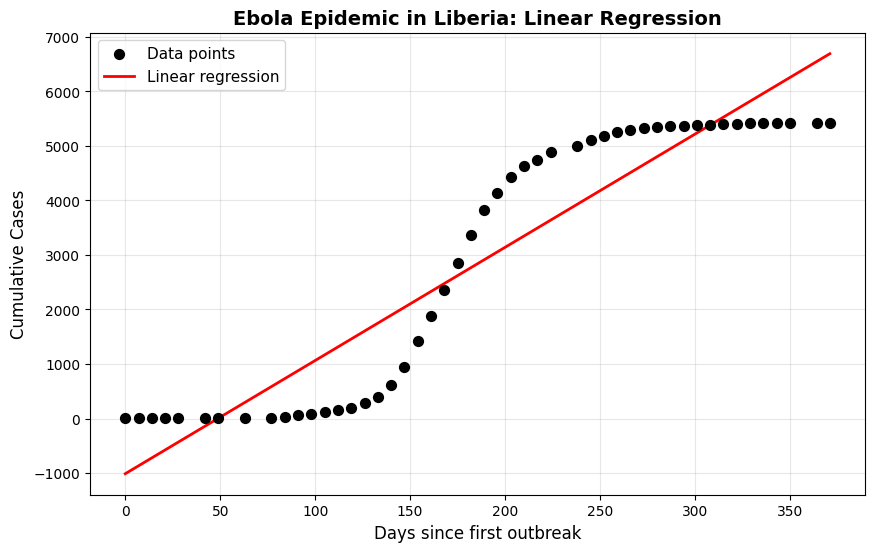

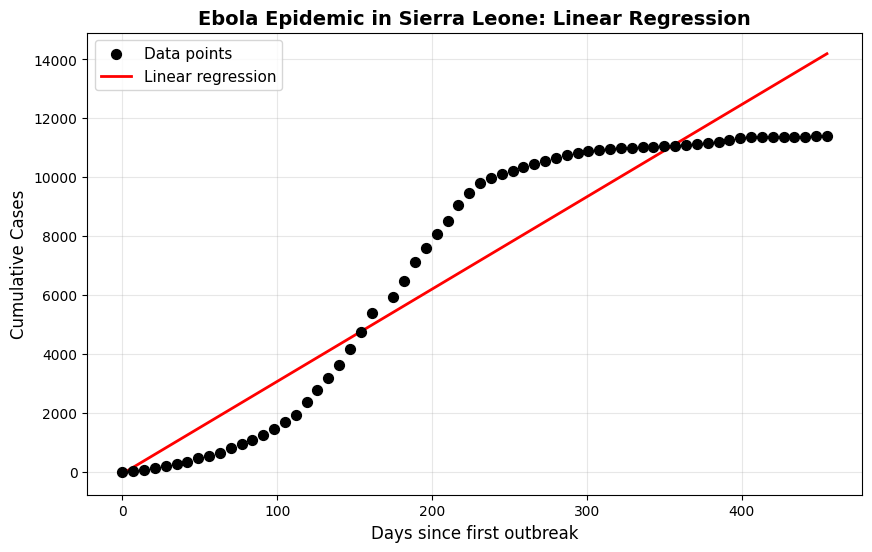

In [ ]:

for country, (days, new_cases, cumulative_cases) in countries_data.items():
    model, slope, intercept = train_linear_regression(days, cumulative_cases)
    plot_linear_regression(days, cumulative_cases, model, country)
    plt.show()


## Task 2: Train a better fitting function than a single line with linear regression on the data for the three countries



Analyzing Guinea

Model Comparison for Guinea:
--------------------------------------------------
Linear                    R² = 0.933018
Polynomial (degree 2)     R² = 0.937091
Polynomial (degree 3)     R² = 0.988443

Best model: Polynomial (degree 3) (R² = 0.988443)


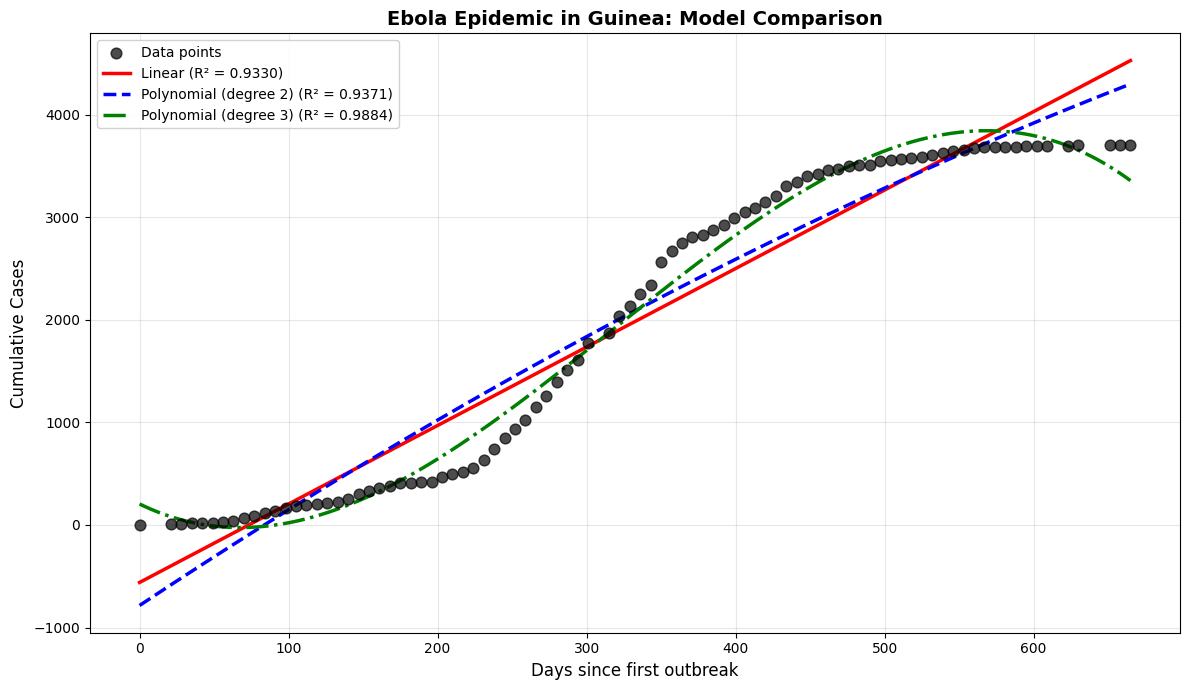

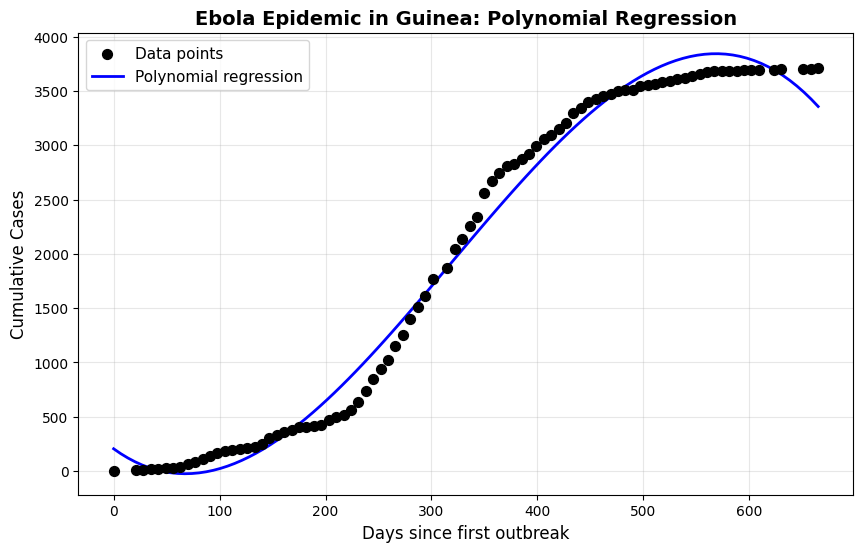


Analyzing Liberia

Model Comparison for Liberia:
--------------------------------------------------
Linear                    R² = 0.871521
Polynomial (degree 2)     R² = 0.873369
Polynomial (degree 3)     R² = 0.965179

Best model: Polynomial (degree 3) (R² = 0.965179)


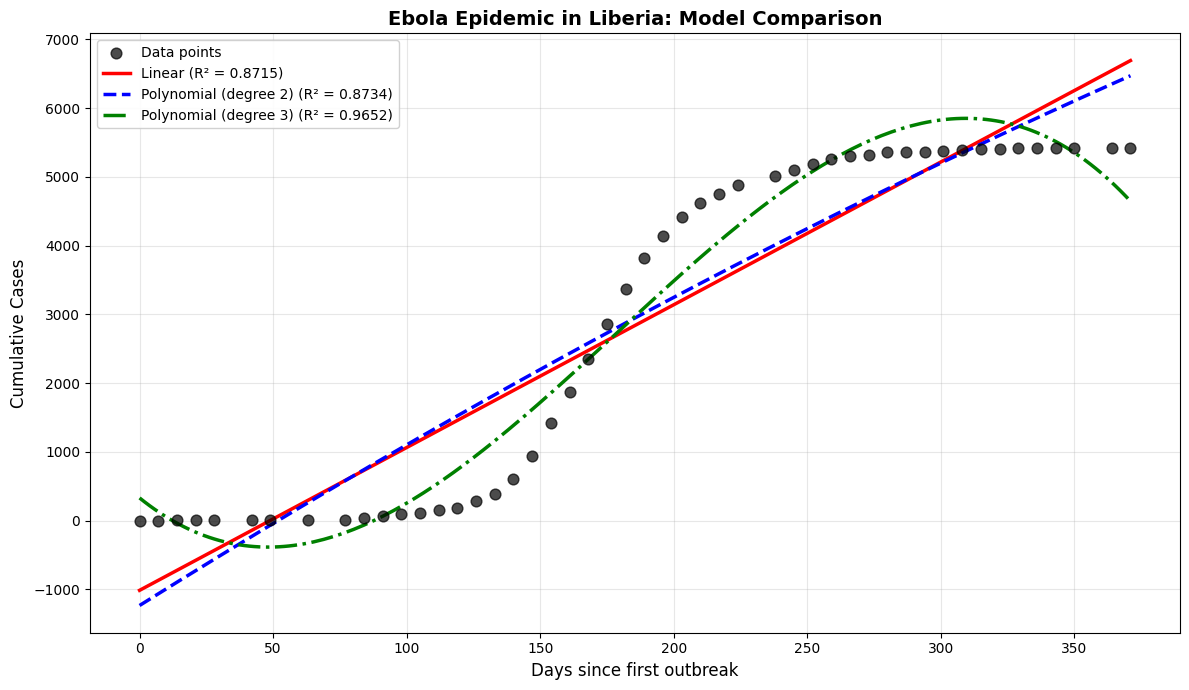

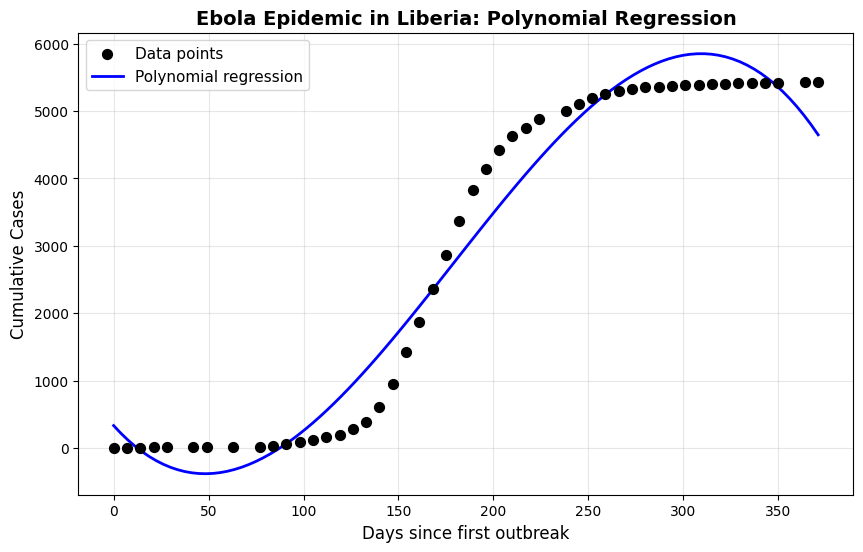


Analyzing Sierra Leone

Model Comparison for Sierra Leone:
--------------------------------------------------
Linear                    R² = 0.887606
Polynomial (degree 2)     R² = 0.952050
Polynomial (degree 3)     R² = 0.976407

Best model: Polynomial (degree 3) (R² = 0.976407)


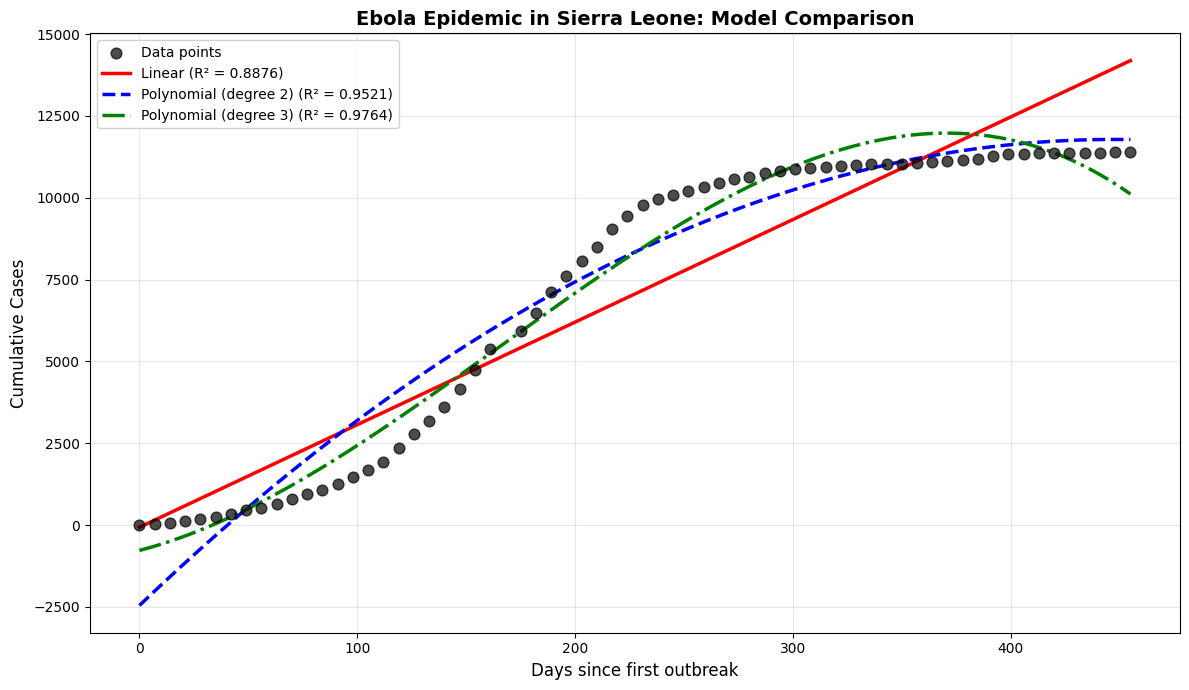

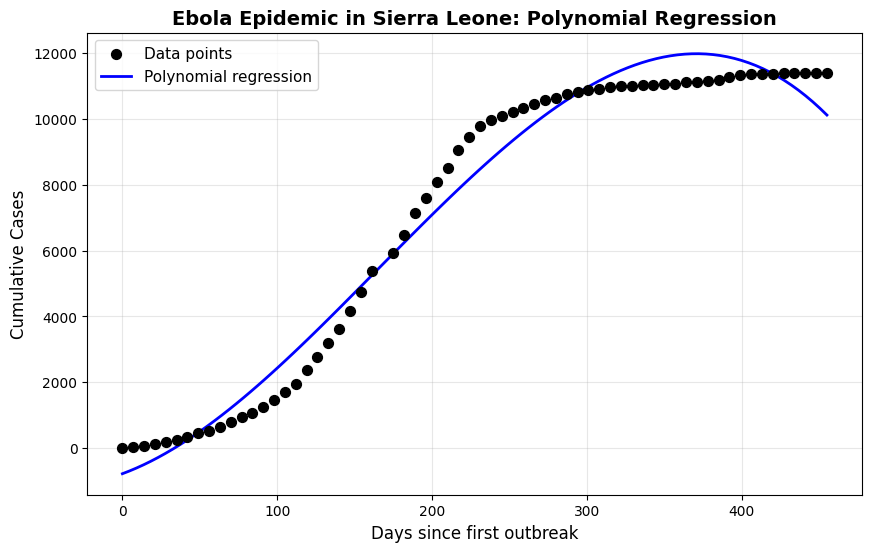

In [ ]:


for country, (days, new_cases, cumulative_cases) in countries_data.items():
    print(f"\n{'='*60}")
    print(f"Analyzing {country}")
    print('='*60)
    

    models = compare_models(days, cumulative_cases, country)

    plot_model_comparison(days, cumulative_cases, models, country)
    
    
    best_key = max(models.keys(), key=lambda k: models[k]['r2'])
    if best_key != 'linear':
        best_model = models[best_key]['model']
        plot_polynomial_regression(days, cumulative_cases, best_model, country)
        plt.show()
